In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy

#read csv
data = pd.read_csv('masterdata2016.csv')
data.head()

,No,NIM,OOP,RPB,PI,APSI,WEB,Statistik,Matdis,Alpro,...,SE,PO,SCM,EA,Basdat,Manjarkom,Sisop,MSDM,Desjar,Manprosi
0,1,1202160002,4.0,3.5,4.0,3.5,4.0,3.5,3.5,3.5,...,4.0,3.5,3.5,4.0,3.5,3.5,4.0,3.5,3.5,3.5
1,2,1202160009,4.0,3.5,3.5,3.5,3.5,3.5,3.5,4.0,...,3.5,3.5,4.0,3.5,3.5,3.0,3.5,4.0,3.5,3.5
2,3,1202160010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
3,4,1202160011,4.0,4.0,3.5,3.5,4.0,3.0,4.0,3.5,...,3.5,3.0,3.5,3.5,4.0,3.5,3.5,3.5,2.5,3.5
4,5,1202160013,3.5,3.0,3.5,2.0,2.0,2.5,4.0,3.5,...,3.5,2.5,2.5,3.5,3.5,2.5,2.0,1.0,4.0,4.0


In [10]:
def clustering_peminatan(data,syarat1, syarat2, syarat3, syarat4) :
    data_selection = data[[syarat1,syarat2,syarat3,syarat4]]
    
    cluster = KMeans(n_clusters=2).fit(data_selection)
    cluster.labels_
    cluster_label = cluster.predict(data_selection)
    
    centroids = cluster.cluster_centers_
    
    NewData = pd.DataFrame()
    NewData['NIM'] = data['NIM']
    NewData['Label'] = cluster_label
#     dist = scipy.spatial.distance.cdist(data_selection, centroids)

#     dists = pd.DataFrame(
#     dist, 
#     columns=['Distance {}'.format(i) for i in range(len(centroids))],
#     index=NewData.index)
       
#     NewData = pd.concat([NewData,dists], axis=1)
    
    return NewData

In [14]:
#techno
techno = clustering_peminatan(data,'OOP','RPB','WEB','PI')
techno.head()


,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [32]:
techno.to_csv('techno.csv')

In [16]:
#ead
ead = clustering_peminatan(data,'OOP','APSI','RPB','WEB')
ead.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [33]:
ead.to_csv('ead.csv')

In [18]:
#edm
edm = clustering_peminatan(data,'Statistik', 'Matdis', 'Alpro', 'Strukdat')
edm.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [34]:
edm.to_csv('edm.csv')

In [21]:
#erp
erp = clustering_peminatan(data,'SE','RPB','PO','SCM')
erp.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [35]:
erp.to_csv('erp.csv')

In [26]:
#ea
ea = clustering_peminatan(data,'RPB','APSI','EA','Basdat')
ea.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [36]:
ea.to_csv('ea.csv')

In [29]:
#eim
eim = clustering_peminatan(data,'Desjar','Manjarkom','Sisop','Manprosi')
eim.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [37]:
eim.to_csv('eim.csv')

In [31]:
ism = clustering_peminatan(data,'SE','Manjarkom','Sisop','MSDM')
ism.head()

,NIM,Label
0,1202160002,1
1,1202160009,1
2,1202160010,0
3,1202160011,1
4,1202160013,1


In [38]:
ism.to_csv('ism.csv')

In [5]:
def filter_csv(name) :
    temp = pd.read_csv(name)
    temp = temp.drop('NIM', 1)
    temp = temp.drop('Unnamed: 0', 1)
    return temp

techno = filter_csv("peminatan_csv/techno.csv")
ea = filter_csv("peminatan_csv/ea.csv")
ead = filter_csv("peminatan_csv/ead.csv")
edm = filter_csv("peminatan_csv/edm.csv")
erp = filter_csv("peminatan_csv/erp.csv")
ism = filter_csv("peminatan_csv/ism.csv")
eim = filter_csv("peminatan_csv/eim.csv")

In [6]:
matriks = pd.DataFrame(data.NIM)
matriks['Technopreneur'] = techno.Label
matriks['EAD'] = ead.Label
matriks['ERP'] = erp.Label
matriks['EDM'] = edm.Label
matriks['EA'] = ea.Label
matriks['ISM'] = ism.Label
matriks['EIM'] = eim.Label
matriks.head()

,NIM,Technopreneur,EAD,ERP,EDM,EA,ISM,EIM
0,1202160002,1,1,1,1,1,1,1
1,1202160009,1,1,1,1,1,1,1
2,1202160010,0,0,0,0,0,0,0
3,1202160011,1,1,1,1,1,1,1
4,1202160013,1,1,1,1,1,1,1


In [7]:
matriks = matriks.iloc[:403]
matriks.head()

,NIM,Technopreneur,EAD,ERP,EDM,EA,ISM,EIM
0,1202160002,1,1,1,1,1,1,1
1,1202160009,1,1,1,1,1,1,1
2,1202160010,0,0,0,0,0,0,0
3,1202160011,1,1,1,1,1,1,1
4,1202160013,1,1,1,1,1,1,1


In [17]:
peminatan = pd.read_csv('2016 data v5.csv')
peminatan

,No,NIM,OOP,RPB,RPL,PI,APSI,WEB,Statistik,Matdis,...,EA,Basdat,Manjarkom,Sisop,MSDM,Desjar,KSI,Pilihan 1,Pilihan 2,Peminatan
0,1,1202160002,4.0,3.5,0.0,4.0,3.5,4.0,3.5,3.5,...,4.0,3.5,3.5,4.0,3.5,3.5,0.0,ERP,EDM,ERP
1,2,1202160009,4.0,3.5,0.0,3.5,3.5,3.5,3.5,3.5,...,3.5,3.5,3.0,3.5,4.0,3.5,0.0,ERP,EDM,ERP
2,3,1202160010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0,NaN
3,4,1202160011,4.0,4.0,0.0,3.5,3.5,4.0,3.0,4.0,...,3.5,4.0,3.5,3.5,3.5,2.5,0.0,ERP,EDM,ERP
4,5,1202160013,3.5,3.0,0.0,3.5,2.0,2.0,2.5,4.0,...,3.5,3.5,2.5,2.0,1.0,4.0,0.0,EA,EDM,EDM
5,6,1202160015,1.0,1.0,0.0,3.5,3.5,3.0,2.0,4.0,...,3.5,2.5,1.0,2.0,3.5,2.5,0.0,ISM,EDM,ISM
6,7,1202160019,3.5,2.0,0.0,2.5,3.0,3.5,1.0,3.5,...,2.5,3.5,2.0,2.5,1.0,2.0,0.0,EAD,ISM,EAD
7,8,1202160020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
8,9,1202160023,3.0,3.5,0.0,3.5,3.5,3.5,2.0,3.0,...,3.5,3.0,1.0,2.0,3.5,3.0,0.0,EA,EAD,EAD
9,10,1202160024,2.0,2.5,0.0,3.5,3.5,3.0,0.0,1.0,...,3.0,1.0,2.0,2.0,3.5,2.5,0.0,ISM,EAD,ISM


In [9]:
peminatan_selection = peminatan['Peminatan']
matriks['Peminatan'] = peminatan_selection
matriks.head()

,NIM,Technopreneur,EAD,ERP,EDM,EA,ISM,EIM,Peminatan
0,1202160002,1,1,1,1,1,1,1,ERP
1,1202160009,1,1,1,1,1,1,1,ERP
2,1202160010,0,0,0,0,0,0,0,NaN
3,1202160011,1,1,1,1,1,1,1,ERP
4,1202160013,1,1,1,1,1,1,1,EDM


In [10]:
isCocok = [0] * len(matriks)
for index, row in matriks.iterrows():
    if row['Peminatan'] == 'TECHNO':
        if row['Technopreneur'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'EAD':
        if row['EAD'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'EDM':
        if row['EDM'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'ERP':
        if row['ERP'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'EAA' or row['Peminatan'] == 'EA':
        if row['EA'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'ISM':
        if row['ISM'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    elif row['Peminatan'] == 'EIM':
        if row['EIM'] == 1 :
            isCocok[index] = "Cocok"
        else :
            isCocok[index] = "Tidak Cocok"
    else :
        isCocok[index] = "Tidak Memilih"
    

In [11]:
matriks['Keterangan'] = isCocok
matriks.head()

,NIM,Technopreneur,EAD,ERP,EDM,EA,ISM,EIM,Peminatan,Keterangan
0,1202160002,1,1,1,1,1,1,1,ERP,Cocok
1,1202160009,1,1,1,1,1,1,1,ERP,Cocok
2,1202160010,0,0,0,0,0,0,0,NaN,Tidak Memilih
3,1202160011,1,1,1,1,1,1,1,ERP,Cocok
4,1202160013,1,1,1,1,1,1,1,EDM,Cocok


In [12]:
jumlah_cocok = 0
jumlah_tidak_cocok = 0
jumlah_tidak_memilih = 0

for index, row in matriks.iterrows():
    if row['Keterangan'] == "Cocok" :
        jumlah_cocok = jumlah_cocok + 1
    elif row['Keterangan'] == "Tidak Cocok" :
        jumlah_tidak_cocok = jumlah_tidak_cocok + 1
    else :
        jumlah_tidak_memilih = jumlah_tidak_memilih + 1   

In [15]:
data_cocok = [['Cocok', jumlah_cocok],
              ['Tidak Cocok', jumlah_tidak_cocok],
              ['Tidak Memilih', jumlah_tidak_memilih],
              ['Total Mahasiswa', len(matriks)]] 

total_cocok = pd.DataFrame(data_cocok, columns = ['Status', 'Jumlah']) 
  
total_cocok 

,Status,Jumlah
0,Cocok,314
1,Tidak Cocok,36
2,Tidak Memilih,53
3,Total Mahasiswa,403


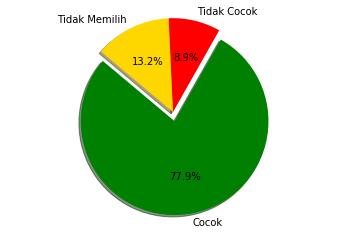

In [16]:
labels = 'Cocok', 'Tidak Cocok', 'Tidak Memilih'
sizes = [jumlah_cocok, jumlah_tidak_cocok, jumlah_tidak_memilih]
colors = ['green', 'red', 'gold']
explode = (0.1, 0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()